In [8]:
# adf test is test to check stationarity
# prob ( 0 to 1)
# test 5 % -->   .05
# if p value is less then .05 reject the null hypothesis

# before testing
# decide rules
#Ho  :- be

In [9]:
# 40,50,23,45,67,77,70,32,19,18,29,43,55,56,59,50,30,39,37,25,26,49,47,62,65,71,73

# give the data in 2 groups --->
# Kmeans.

In [10]:
# If K is increases SSD is increases.
# when K = 0
# SSD = 0

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv(r"C:\Users\Kapil\Downloads\mall_kmeans.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
df["Genre"]

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

In [14]:
df.shape

(200, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
# is owner of shopping want to make groups so that they can reach to customer (target) customers
# based on the genre age ,income and spending score
# find the optimum number of clusters.
# unique identifier is never using in model building

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
df.Genre.replace({"Male":1 ,"Female":0 } ,inplace = True);

In [20]:
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [21]:
df = df.iloc[: ,1::]

In [22]:
df.head(3)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(df)       # model has been created

KMeans(n_clusters=3)

# how many clusters 
# how many records in each clusters
# what is the centre of that cluster (mean)

In [24]:
km.labels_   # ans of second question


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [25]:
km.cluster_centers_

array([[ 0.40650407, 40.32520325, 44.15447154, 49.82926829],
       [ 0.52631579, 40.39473684, 87.        , 18.63157895],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

data science each col is dimentions

In [26]:
# centre of that cluster (mean)

 #        Genre                  Age                    Income             Score
 #       0.46153846          32.69230769           86.53846154       82.12820513
 #       0.52631579          40.39473684           87.               18.63157895
 #       0.40650407          40.32520325           44.15447154       49.82926829

 # stategies are made on group level
 # 0.5 above are men and below are women

In [27]:
# how to find SSD

km.score(df)    # SSD ignores the sign ----> 143391.59236035674

-143391.59236035674

In [28]:
empty_List = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    score = km.score(df)
    empty_List.append(score)

print(empty_List)    

[-308862.06, -221222.99561403508, -157034.2642363849, -105312.0947368421, -75528.58656469134, -58385.19791162608, -51458.29097412091, -44682.91441057066, -41891.19483225108, -37400.130982236165]


In [29]:
empty_List = np.round(np.abs(empty_List))

In [30]:
empty_List

array([308862., 221223., 157034., 105312.,  75529.,  58385.,  51458.,
        44683.,  41891.,  37400.])

In [31]:
number_of_cluster = list(range(1,11))


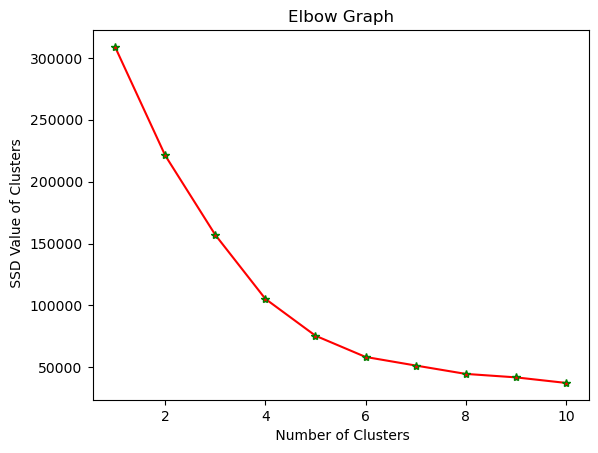

In [32]:
plt.plot(number_of_cluster , empty_List ,marker = "*",color = "red",mec="green")
plt.title("Elbow Graph")
plt.xlabel(" Number of Clusters")
plt.ylabel(" SSD Value of Clusters")
plt.show()

In [33]:
# u can take 1 value up or 1 value down. E.g. 5 u can take 4 as well as 6
# Over after Kmeans
# marketing Teams / Sales

In [34]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(df)  


KMeans(n_clusters=5)

In [35]:
df["ClustNum"] =km.labels_

In [36]:
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [37]:
df.ClustNum.value_counts()

ClustNum
2    76
1    39
0    37
3    25
4    23
Name: count, dtype: int64

In [38]:
df = df.sort_values("ClustNum")
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),ClustNum
124,0,23,70,29,0
162,1,19,81,5,0
166,1,42,86,20,0
164,1,50,85,26,0
172,1,36,87,10,0
...,...,...,...,...,...
26,0,45,28,32,4
18,1,52,23,29,4
16,0,35,21,35,4
20,1,35,24,35,4


# df["Value_in_each_clusters"].value_counts

In [39]:
clust_cent =pd.DataFrame(km.cluster_centers_)
clust_cent

,0,1,2,3
0,0.513514,40.324324,87.432432,18.189189
1,0.461538,32.692308,86.538462,82.128205
2,0.407895,43.934211,55.210526,49.447368
3,0.440000,24.960000,28.040000,77.000000
4,0.391304,45.217391,26.304348,20.913043


In [40]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'ClustNum'],
      dtype='object')

In [41]:
clust_cent.columns = list(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
clust_cent

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.513514,40.324324,87.432432,18.189189
1,0.461538,32.692308,86.538462,82.128205
2,0.407895,43.934211,55.210526,49.447368
3,0.440000,24.960000,28.040000,77.000000
4,0.391304,45.217391,26.304348,20.913043


Text(0, 0.5, 'Spending Score')

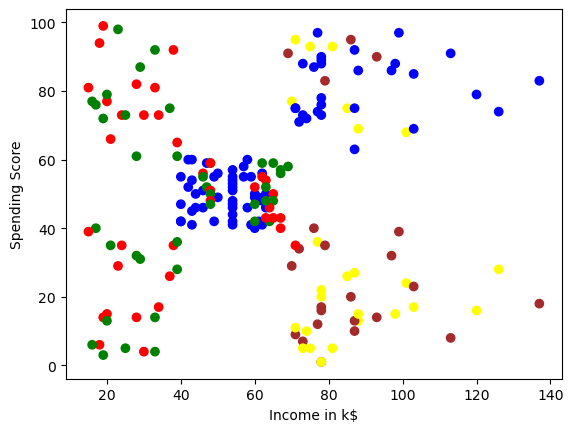

In [42]:
colormap = np.array(["Red","Green","Blue","Yellow", "brown"])    # is just a variable name
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"], c=colormap[km.labels_])
plt.xlabel("Income in k$")
plt.ylabel("Spending Score")            

In [43]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),ClustNum
124,0,23,70,29,0
162,1,19,81,5,0
166,1,42,86,20,0
164,1,50,85,26,0
172,1,36,87,10,0


In [44]:
list(empty_List)

[np.float64(308862.0),
 np.float64(221223.0),
 np.float64(157034.0),
 np.float64(105312.0),
 np.float64(75529.0),
 np.float64(58385.0),
 np.float64(51458.0),
 np.float64(44683.0),
 np.float64(41891.0),
 np.float64(37400.0)]

In [45]:
l1 = list(empty_List)

In [46]:
i = 0
while i < len(l1) - 1:
    print("% change of ", i + 1 , "to" , i + 2 ,round((l1[i] - l1[i + 1]) * 100 / l1[i]))
    i = i + 1

% change of  1 to 2 28
% change of  2 to 3 29
% change of  3 to 4 33
% change of  4 to 5 28
% change of  5 to 6 23
% change of  6 to 7 12
% change of  7 to 8 13
% change of  8 to 9 6
% change of  9 to 10 11


In [ ]:
# Hierarchial clustering

In [47]:
df = pd.read_csv(r"C:\Users\Kapil\Downloads\mall_kmeans.csv")
df.Genre.replace({"Male":1 , "Female":0}, inplace = True);
df = df.iloc[ : , 1 :: ]

In [48]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [49]:
from scipy.cluster.hierarchy import linkage,dendrogram
z = linkage(df , "ward")      # uses SSE to make clusters

#z
# link between record (place under the cluster)

Text(0, 0.5, 'Distance')

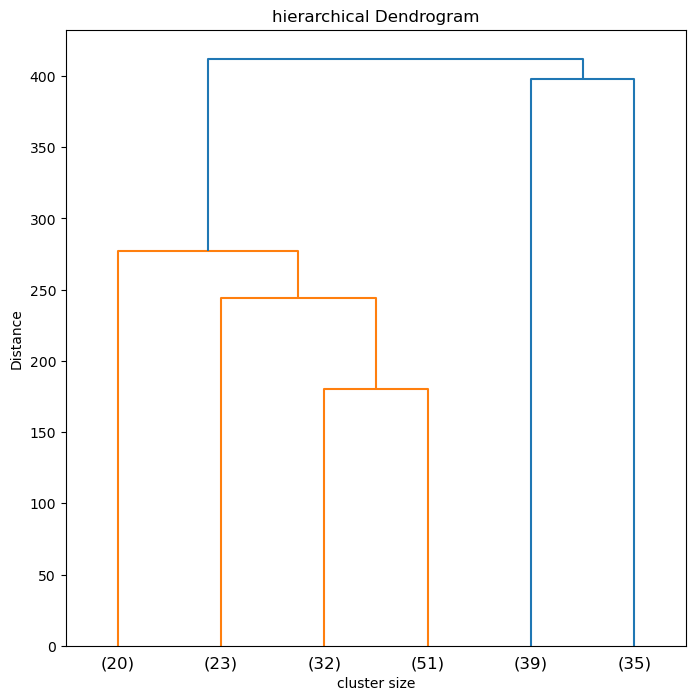

In [51]:
fig = plt.figure(figsize =(8,8))   ## just to increase the size of the figure
dendrogram(z , p = 6 ,truncate_mode = "lastp")    # 4 clusters

# truncate_mode = "lastp" if it is not used , it will give name of each 200 record in this example 
# p = no of cluster 
plt.title("hierarchical Dendrogram")
plt.xlabel("cluster size")
plt.ylabel("Distance") 

# from this rec
           

In [52]:
# because in hieracial clustring is not done using centroids(mean)

In [53]:
from sklearn.cluster import AgglomerativeClustering # hiearcial clustering
cluster = AgglomerativeClustering(n_clusters = 4)
pred = cluster.fit_predict(df)

In [54]:
pd.Series(pred).value_counts()

0    106
2     39
1     35
3     20
Name: count, dtype: int64